In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
INIT_VALUE = 5.

In [22]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = INIT_VALUE
    self.N = 1. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [58]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    choices = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        # use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])
        
        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update rewards log
        choices[i] = j
        
        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    
    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)
    
    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N-1 for b in bandits])
    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()
    
    return rewards, choices

In [59]:
# log p_estimate change of bandit[ind] during experiments
def p_estimates(ind, rewards, choices):
    indices_ind = np.argwhere(choices == ind).flatten()
    
    rewards_ind = np.zeros(NUM_TRIALS)
    rewards_ind[indices_ind] = rewards[indices_ind]
    rewards_ind[0] += INIT_VALUE
    cum_rewards_ind = rewards_ind.cumsum()

    counts_ind = np.zeros(NUM_TRIALS)
    counts_ind[indices_ind] = 1 # later use cumsum() for step function
    counts_ind[0] += 1
    cum_counts_ind = counts_ind.cumsum()

    p_estimates_ind = cum_rewards_ind / cum_counts_ind
    return p_estimates_ind

mean estimate: 0.6666666666666666
mean estimate: 0.6896551724137931
mean estimate: 0.7526601084119656
total reward earned: 7511.0
overall win rate: 0.7511
num times selected each bandit: [11.0, 28.0, 9961.0]


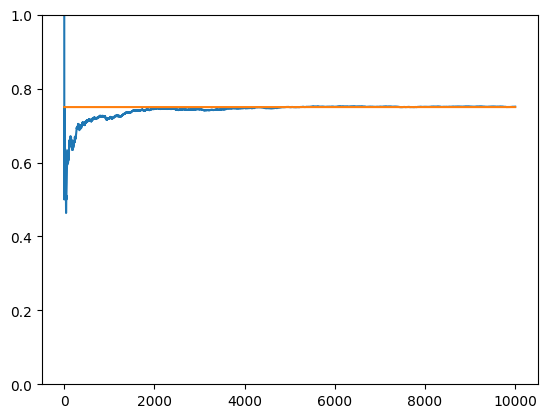

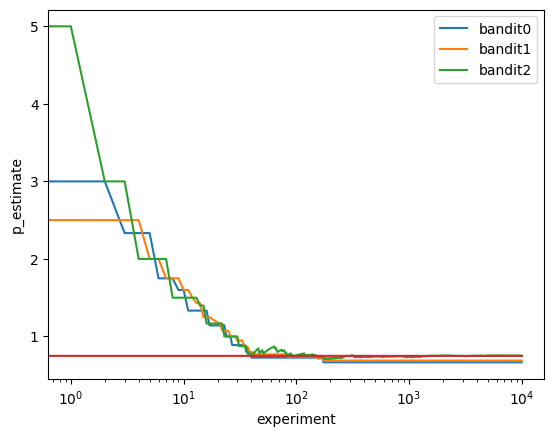

In [74]:
if __name__ == "__main__":
    rewards, choices = experiment()

    p_estimates_0 = p_estimates(0, rewards, choices)
    p_estimates_1 = p_estimates(1, rewards, choices)
    p_estimates_2 = p_estimates(2, rewards, choices)

    plt.plot(p_estimates_0, label='bandit0') # x plot from 0
    plt.plot(p_estimates_1, label='bandit1')
    plt.plot(p_estimates_2, label='bandit2')
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.legend()
    plt.xscale('log')
    # plt.xlim([0,NUM_TRIALS])
    plt.xlabel('experiment')
    plt.ylabel('p_estimate')
    plt.show()

In [75]:
p_estimates_0[0]

np.float64(3.0)

In [76]:
p_estimates_1[1]

np.float64(2.5)

In [77]:
p_estimates_2[0]

np.float64(5.0)

In [33]:
help(np.astype)

Help on _ArrayFunctionDispatcher in module numpy:

astype(x, dtype, /, *, copy=True, device=None)
    Copies an array to a specified data type.

    This function is an Array API compatible alternative to
    `numpy.ndarray.astype`.

    Parameters
    ----------
    x : ndarray
        Input NumPy array to cast. ``array_likes`` are explicitly not
        supported here.
    dtype : dtype
        Data type of the result.
    copy : bool, optional
        Specifies whether to copy an array when the specified dtype matches
        the data type of the input array ``x``. If ``True``, a newly allocated
        array must always be returned. If ``False`` and the specified dtype
        matches the data type of the input array, the input array must be
        returned; otherwise, a newly allocated array must be returned.
        Defaults to ``True``.
    device : str, optional
        The device on which to place the returned array. Default: None.
        For Array-API interoperability only,

mean estimate: 0.7272727272727273
mean estimate: 0.7368421052631579
mean estimate: 0.7504261506066364
total reward earned: 7491.0
overall win rate: 0.7491
num times selected each bandit: [10.0, 18.0, 9972.0]


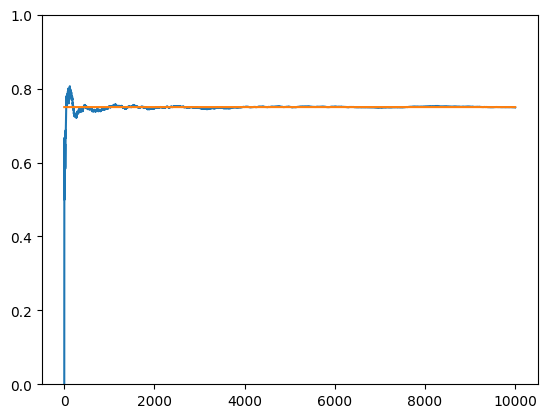

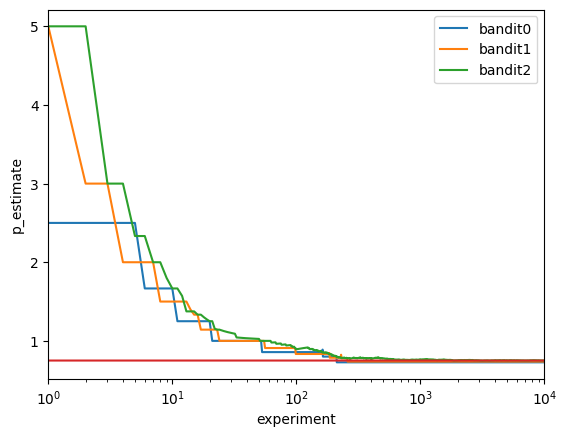

In [88]:
if __name__ == "__main__":
    rewards, choices = experiment()

    p_estimates_0 = p_estimates(0, rewards, choices)
    p_estimates_1 = p_estimates(1, rewards, choices)
    p_estimates_2 = p_estimates(2, rewards, choices)

    experiments = np.arange(NUM_TRIALS) + 1
    
    plt.plot(experiments, p_estimates_0, label='bandit0') # x plot from 1
    plt.plot(experiments, p_estimates_1, label='bandit1')
    plt.plot(experiments, p_estimates_2, label='bandit2')
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.legend()
    plt.xscale('log')
    plt.xlim([1,NUM_TRIALS])
    plt.xlabel('experiment')
    plt.ylabel('p_estimate')
    plt.show()

In [79]:
p_estimates_0.T.shape

(10000,)

In [86]:
experiments = np.arange(NUM_TRIALS) + 1
experiments.shape

(10000,)

In [84]:
type(p_estimates_0)

numpy.ndarray

In [85]:
type(experiments)

numpy.int64